In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('D:/git_titanic/train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 성별과 나이 데이터 결측치 제거  및 시각화

###  ■ 성별 feature

In [4]:
df_train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 성별과 생존여부의 상관관계 확인을 위하여<br>크로스 테이블 및 시각화 그래프로 표현합니다.

In [5]:
# 크로스테이블
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


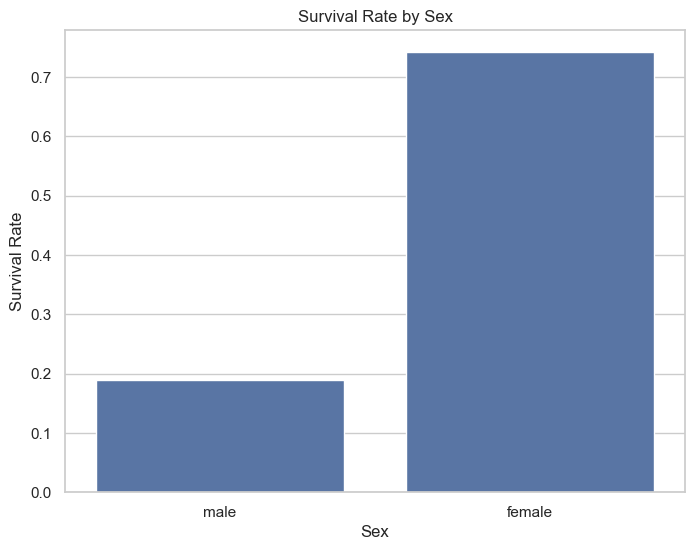

In [6]:
# 성별에 따른 생존률 - 시각화

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df_train, ci=None)

plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')

plt.show()

##### female 이 살 확률이 male 보다 압도적으로 높음을 확인할 수 있습니다.

###  ■ 연령 feature

In [7]:
# 연령의 결측치를 평균으로 대체

# 대체 전
print(df_train['Age'].isnull().sum() )

# 대체 후
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Age'].isnull().sum() 

177


0

##### 대체 전 177개의 Null Data 가 있었고, 이후 대체됨을 확인하였습니다.

#### 연령에 따른 생존률

0    29.699118
Name: Age, dtype: float64


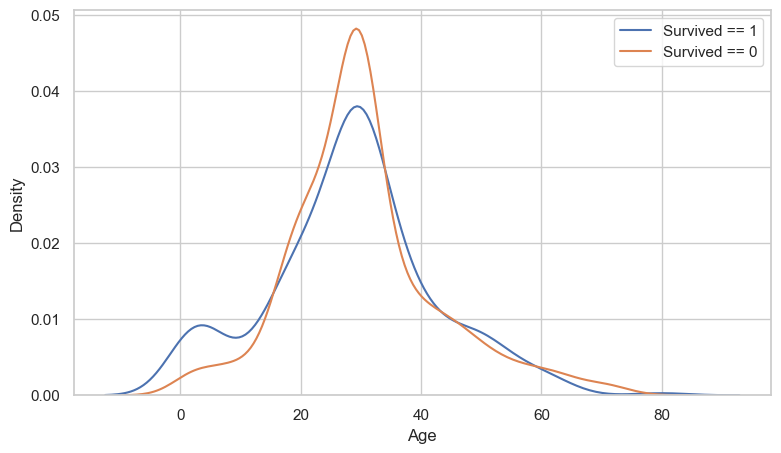

In [8]:
# 카테고리화 이전
# 연령에 따른 생존률 - 시각화

print(df_train['Age'].mode())

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

##### 1. mode 함수 - 함수 결과를 통해 연령대의 최빈값이 29세임을 확인할 수 있습니다.
##### 2. 그래프 - 연령에 따른 생존률을 시각적으로 확인합니다. <br> 어린 나이(약 15세 미만) 구간에서 생존률이 상대적으로 높고, <br> 30세 구간에서 생존률이 상대적으로 낮음을 확인할 수 있습니다


### 연령을 카테고리화

In [9]:
# 연령을 카테고리로 분할합니다.
# 추후 작업할 플롯 그래프 x축과 크로스테이블의 행을
# 보다 체계적으로 나누기 위하여 작업하는 과정입니다.

# 한글깨짐 방지
plt.rc('font', family='NanumGothic')
%matplotlib inline

# 연령을 카테고리화하는 함수
def category_age(x):
    if x <= 9:
        return '9세 이하'
    elif x < 20:
        return '10대'
    elif x < 30:
        return '20대'
    elif x < 40:
        return '30대'
    elif x < 50:
        return '40대'
    elif x < 60:
        return '50대'
    elif x < 70:
        return '60대'
    elif x < 80:
        return '70대'
    else:
        return '80대 이상'

# 카테고리 순서 지정
# 숫자 순에 따라 '9세'가 뒤로 밀려나지 않도록 순서를 지정합니다.
age_order = ['9세 이하', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']

# 'Age_cat' 열 생성: 연령대를 카테고리로 나누기
df_train['Age_cat'] = pd.Categorical(df_train['Age'].apply(category_age), categories=age_order, ordered=True)

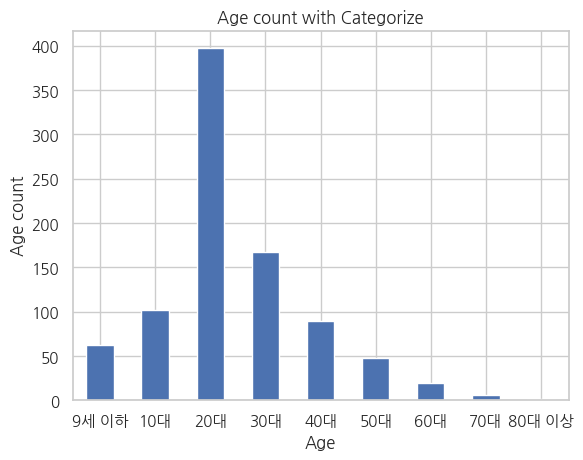

In [10]:
# 카테고리화 이후
# 연령대(카테고리화됨) 분포 - 시각화

# 바 그래프로 시각화
df_train.groupby(['Age_cat'])['PassengerId'].count().plot.bar()

plt.title('Age count with Categorize')
plt.ylabel('Age count')
plt.xlabel('Age')
plt.xticks(rotation=0)

plt.show()

##### 29세 최빈값이 포함된 20대 항목에서 최대의 값을 보이며 <br> 이는, 카테고리화 이전의 그래프와 마찬가지로 동일한 결과입니다.

##### 다음으로, 크로스테이블 및 생존율 비율을 시각화해서 보겠습니다. <br> 바 그래프에서는 80세 구간의 경우, 샘플이 단 1명인 관계로, 퍼센티지는 다소 과장된 모습입니다. <br> (따라서 80대 제외하고 보는 경우에) 9세 미만의 연령대에서 생존율이 가장 높습니다.

In [11]:
# 연령대와 생존여부의 상관관계 확인
# 크로스 테이블로 표현

pd.crosstab(df_train['Age_cat'], df_train['Survived'], margins=True)

Survived,0,1,All
Age_cat,,,
9세 이하,24,38,62
10대,61,41,102
20대,268,129,397
30대,94,73,167
40대,55,34,89
50대,28,20,48
60대,13,6,19
70대,6,0,6
80대 이상,0,1,1


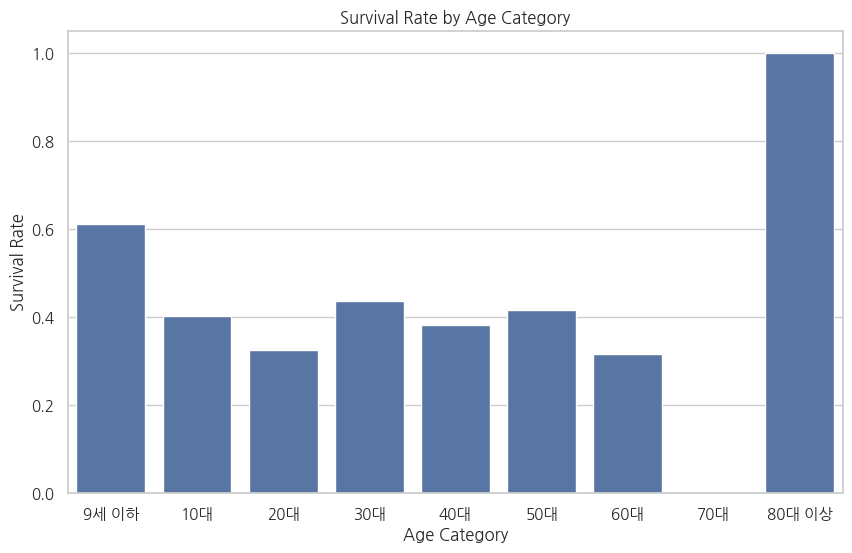

In [12]:
# 연령에 따른 생존률 - 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_cat', y='Survived', data=df_train, ci=None)

plt.title('Survival Rate by Age Category')
plt.ylabel('Survival Rate')
plt.xlabel('Age Category')

plt.show()